<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цій частині ми знову будемо працювати з датасетом fasion_mnist. На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи. Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import keras
import numpy as np
from keras import layers
from keras import models
from keras import utils
import matplotlib.pyplot as plt
import time
import seaborn as sns

from keras.applications import VGG16
from keras.utils import to_categorical

4422102/4422102 [==============================] - 0s 0us/step


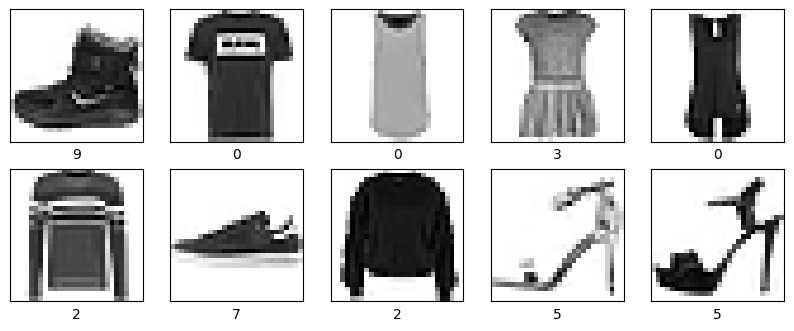

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

VGG16 навчена на зображеннях розміром 224 х 224 пікселів. Наші зображення у наборі даних мають розмір 28 x 28 пікселів, їх необхідно змінити до відповідного розміру для правильної роботи згорткової основи VGG16

In [4]:
print("Розмір x_train перед зміною розміру:", x_train.shape)
print("Розмір x_test перед зміною розміру:", x_test.shape)

# Змінемо розмір зображень
x_train = tf.image.resize(np.array(x_train)[..., tf.newaxis],
                         (32, 32))
x_train = np.repeat(x_train, 3,
                    axis=-1)

x_test = tf.image.resize(np.array(x_test)[..., tf.newaxis],
                         (32, 32))
x_test = np.repeat(x_test, 3,
                   axis=-1)

print("Розмір x_train після зміни розміру:", x_train.shape)
print("Розмір x_test після зміни розміру:", x_test.shape)

# Нормалізація значень пікселів
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворення міток у формат категоріальних змінних
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Розмір x_train перед зміною розміру: (60000, 28, 28)
Розмір x_test перед зміною розміру: (10000, 28, 28)
Розмір x_train після зміни розміру: (60000, 32, 32, 3)
Розмір x_test після зміни розміру: (10000, 32, 32, 3)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 22s 10ms/step - loss: 0.5145 - accuracy: 0.8147 - val_loss: 0.4505 - val_accuracy: 0.8370
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3985 - accuracy: 0.8551 - val_loss: 0.3927 - val_accuracy: 0.8533
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3649 - accuracy: 0.8653 - val_loss: 0.3931 - val_accuracy: 0.8579
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3432 - accuracy: 0.8731 - val_loss: 0.3754 - val_accuracy: 0.8647
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3245 - accuracy: 0.8797 - val_loss: 0.3885 - val_accuracy: 0.8607
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3093 - accuracy: 0.8842 - val_loss: 0.3595 - val_accuracy: 0.8703
Epoch 7/10
1875/1875 [==============================] - 17s 9ms

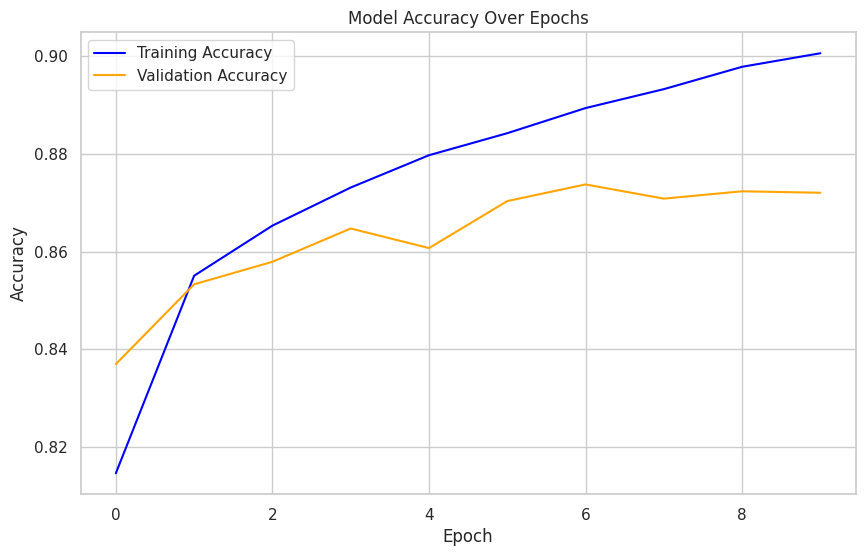

In [5]:
num_classes = 10

input_shape = x_train.shape[1:]

# Створення базової моделі VGG16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Створення моделі класифікації на основі VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

base_model.trainable = False

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time_start = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Зробимо донавчання моделі. Для цього ми розморозимо декілька верхніх шарів базової моделі, перекомпелюємо її і перенавчимо

Epoch 1/5
1875/1875 [==============================] - 63s 30ms/step - loss: 0.2858 - accuracy: 0.8947 - val_loss: 0.3062 - val_accuracy: 0.8924
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2258 - accuracy: 0.9160 - val_loss: 0.2740 - val_accuracy: 0.9044
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1917 - accuracy: 0.9281 - val_loss: 0.2552 - val_accuracy: 0.9108
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1647 - accuracy: 0.9375 - val_loss: 0.2515 - val_accuracy: 0.9113
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1440 - accuracy: 0.9460 - val_loss: 0.2547 - val_accuracy: 0.9136
This took 325.22407126426697 seconds to run.


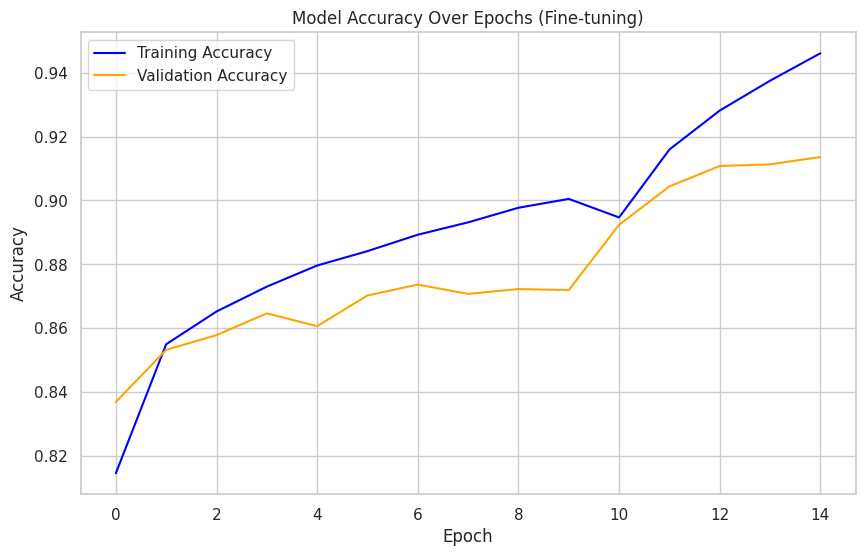

In [6]:
base_model.trainable = True

defrosting_layers = 20
for layer in base_model.layers[:-defrosting_layers]:
    layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time_start_refresher_training = time.time()
history_refresher_training = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
time_end_refresher_training = time.time()

print(f"This took {time_end_refresher_training - time_start_refresher_training} seconds to run.")

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'] + history_refresher_training.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'] + history_refresher_training.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Донавчання показало позитивний результат, точність збільшилась до 94,78%. Функція втрат на навчальному наборі даних зменшується з кожною епохою, що вказує на те, що модель стає більш впевненою в прогнозах. Єдиним мінусом можна назвати час донавчання, він значно збільшився, порівняно з навчанням згорткової нейромережі на згортковій основі VGG16

Останній результат 94,78% - є найкращим, якщо порівнювати з прикладами в ДЗ 10-1 та в ДЗ 9